# Chapter 10 - Problem 10

In this problem, you will generate simulated data, and then perform
PCA and K-means clustering on the data.

**A.** Generate a simulated data set with 20 observations in each of
three classes (i.e. 60 observations total), and 50 variables.

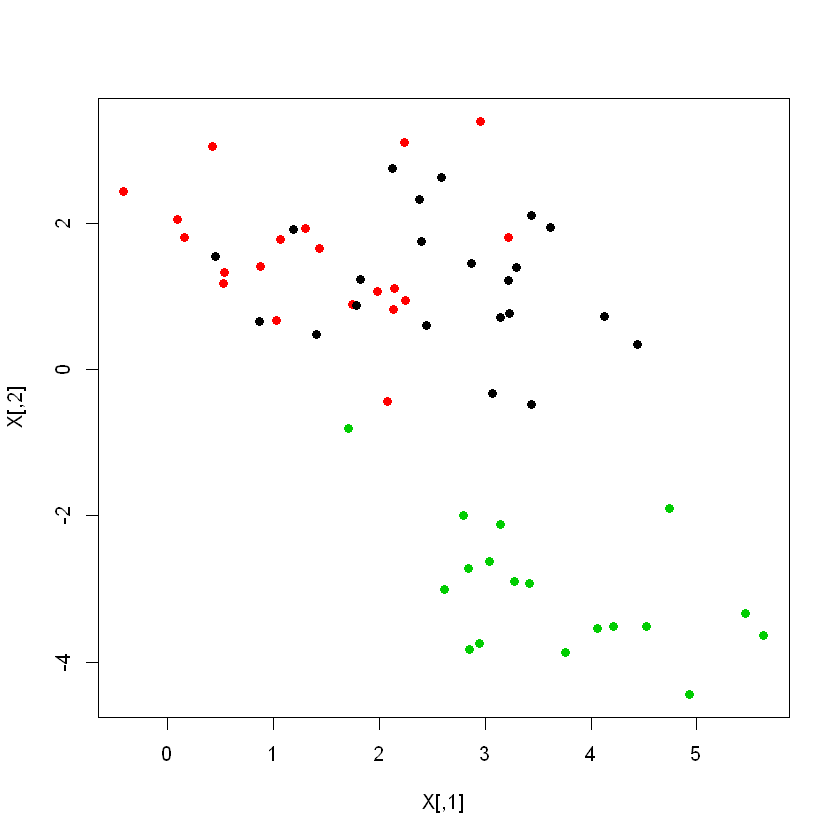

In [176]:
set.seed(10021)
X <- matrix(rnorm(60*50),60,50)
xmeans <- matrix(rnorm(150,sd = 2), 3, 50) 
which <- sample(1:3,60,replace = TRUE)
X <- X + xmeans[which,] # Check the incantation formula used to distribute the means.
plot(X, col = which, pch = 19)



**B.** Perform PCA on the 60 observations and plot the first two principal
component score vectors. Use a different color to indicate
the observations in each of the three classes. If the three classes
appear separated in this plot, then continue on to part (c). If
not, then return to part (a) and modify the simulation so that
there is greater separation between the three classes. Do not
continue to part (c) until the three classes show at least some
separation in the first two principal component score vectors.

In [177]:
pca.out <- prcomp(X)
summary(pca.out)

Importance of components:
                           PC1    PC2     PC3     PC4    PC5     PC6     PC7
Standard deviation     10.7033 7.5486 1.79887 1.74681 1.7167 1.67179 1.59589
Proportion of Variance  0.5249 0.2611 0.01483 0.01398 0.0135 0.01281 0.01167
Cumulative Proportion   0.5249 0.7860 0.80077 0.81475 0.8283 0.84106 0.85273
                           PC8     PC9   PC10    PC11    PC12    PC13    PC14
Standard deviation     1.54373 1.49060 1.3939 1.36270 1.28183 1.25598 1.22278
Proportion of Variance 0.01092 0.01018 0.0089 0.00851 0.00753 0.00723 0.00685
Cumulative Proportion  0.86365 0.87383 0.8827 0.89124 0.89877 0.90599 0.91284
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     1.19909 1.16561 1.13751 1.08654 1.06462 1.04546 1.01480
Proportion of Variance 0.00659 0.00622 0.00593 0.00541 0.00519 0.00501 0.00472
Cumulative Proportion  0.91943 0.92566 0.93158 0.93699 0.94219 0.94719 0.95191
                          PC22    PC23

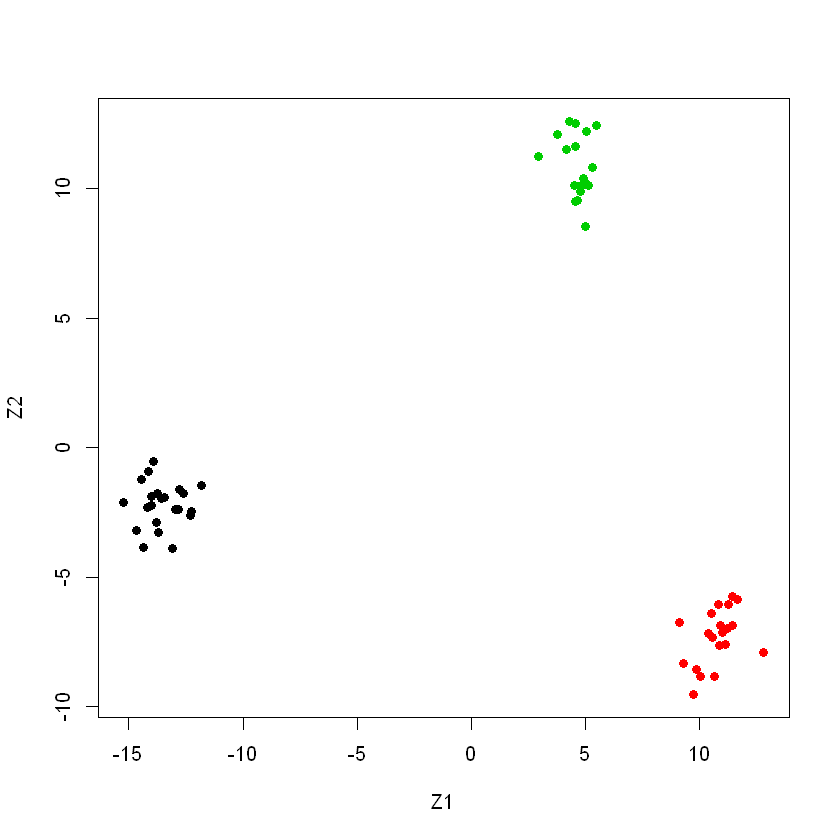

In [178]:
plot(pca.out$x[,1:2], pch =19, col = which,
     xlab = "Z1", ylab = "Z2")

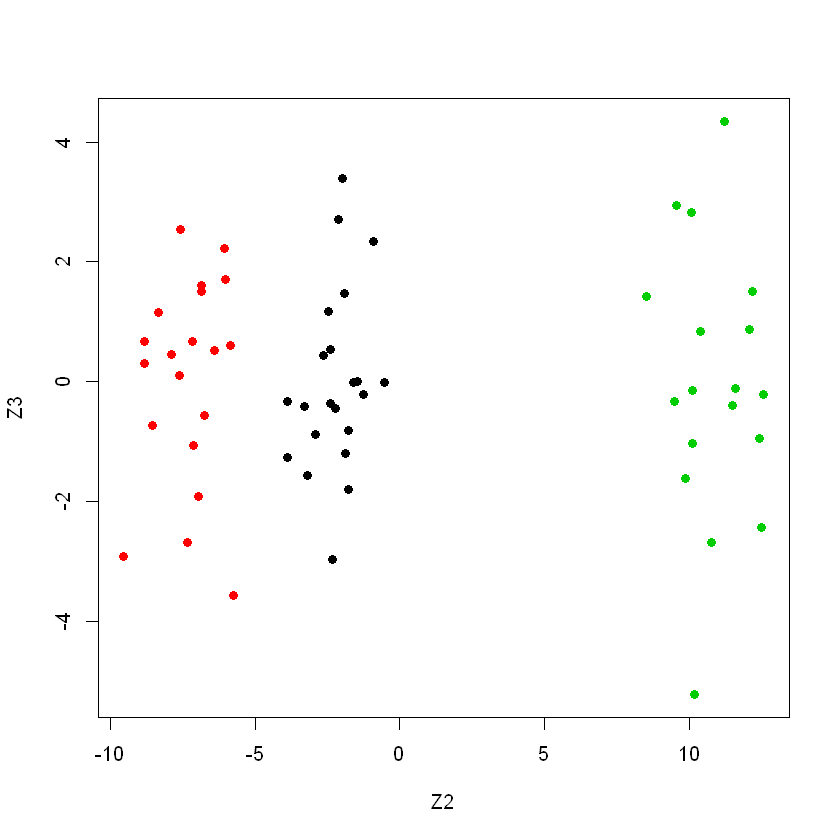

In [179]:
plot(pca.out$x[,c(2,3)], pch =19,col = which,
     xlab = "Z2", ylab = "Z3")

**C.** Perform K-means clustering of the observations with K = 3.
How well do the clusters that you obtained in K-means clustering
compare to the true class labels?

In [180]:
km.out <- kmeans(X,3, nstart = 15)
km.out

K-means clustering with 3 clusters of sizes 18, 20, 22

Cluster means:
      [,1]      [,2]      [,3]       [,4]       [,5]       [,6]       [,7]
1 3.664995 -3.019955 1.5402268  3.1860048 -0.9300984  1.2158669  2.0025241
2 1.387562  1.600513 3.5949647 -3.2057671  0.9130267  0.6547185 -1.7155275
3 2.605219  1.209849 0.1830485  0.1293358 -2.5949696 -1.0584375  0.8209377
       [,8]       [,9]      [,10]      [,11]     [,12]     [,13]     [,14]
1  2.104086 -0.8155074 -0.7098470  0.7983558 2.9662942  4.510126 1.1154408
2 -3.681048 -0.5659893 -1.0546079  3.1204581 0.5890995  1.132671 0.2080056
3  2.636496  4.3912251 -0.6081163 -3.1004536 2.0617915 -2.716148 1.4722163
      [,15]      [,16]      [,17]     [,18]      [,19]     [,20]     [,21]
1 1.7319015 -1.6586478 -1.0029119 -1.762074 -2.5400432  1.762976 0.3199044
2 2.9481059  1.6679128  0.9858798 -4.312913 -2.7764412  2.972621 1.8891744
3 0.3017399 -0.5761339 -1.9197426  2.528561  0.8060288 -3.212085 1.9169505
       [,22]      [,23]      

In [181]:
cluster.color <- km.out$cluster
table(cluster.color,which)

             which
cluster.color  1  2  3
            1  0  0 18
            2  0 20  0
            3 22  0  0

The K-means method with K = 3 assigned all clusters correctly.

**D.** Perform K-means clustering with K = 2. Describe your results.

In [189]:
km.out.2 <- kmeans(X,2, nstart = 15)
cluster.color.2 <- km.out.2$cluster
table(cluster.color.2,which)

               which
cluster.color.2  1  2  3
              1 22  0  0
              2  0 20 18

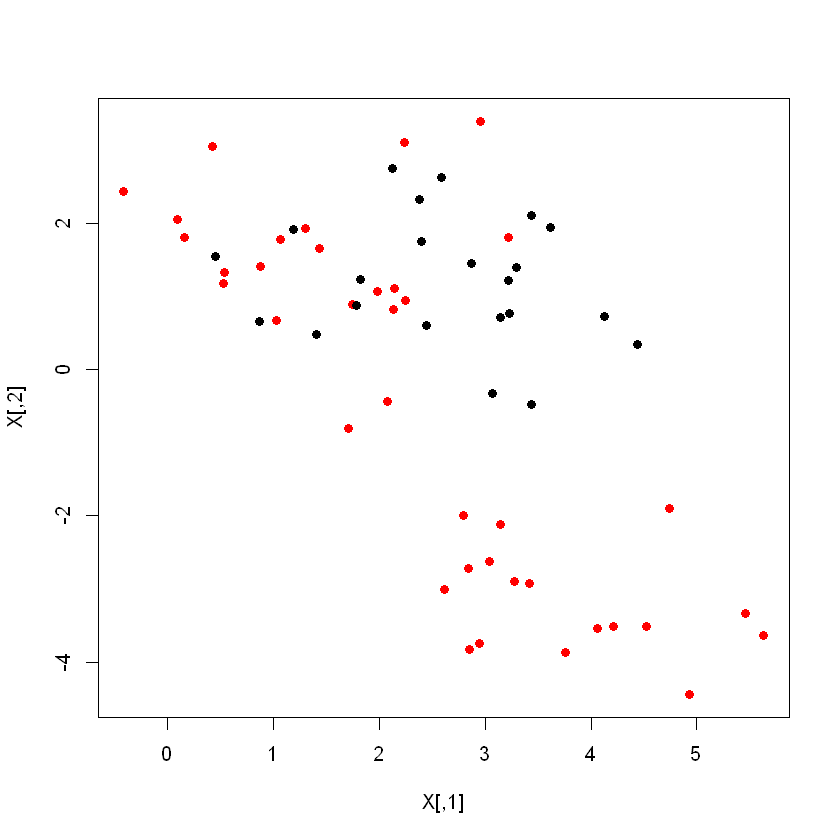

In [190]:
plot(X, col = cluster.color.2, pch = 19)

With K = 2, cluster 2 and 3 where combined into one single cluster. The other cluster remain intact. There are several ways to partition the data into two subgroups, k-means found just one of these possibilities.

**E.** Now perform K-means clustering with K = 4, and describe your
results.

In [192]:
km.out.3 <- kmeans(X,4, nstart = 15)
cluster.color.3 <- km.out.3$cluster
table(cluster.color.3,which)

               which
cluster.color.3  1  2  3
              1  0  0  9
              2 22  0  0
              3  0 20  0
              4  0  0  9

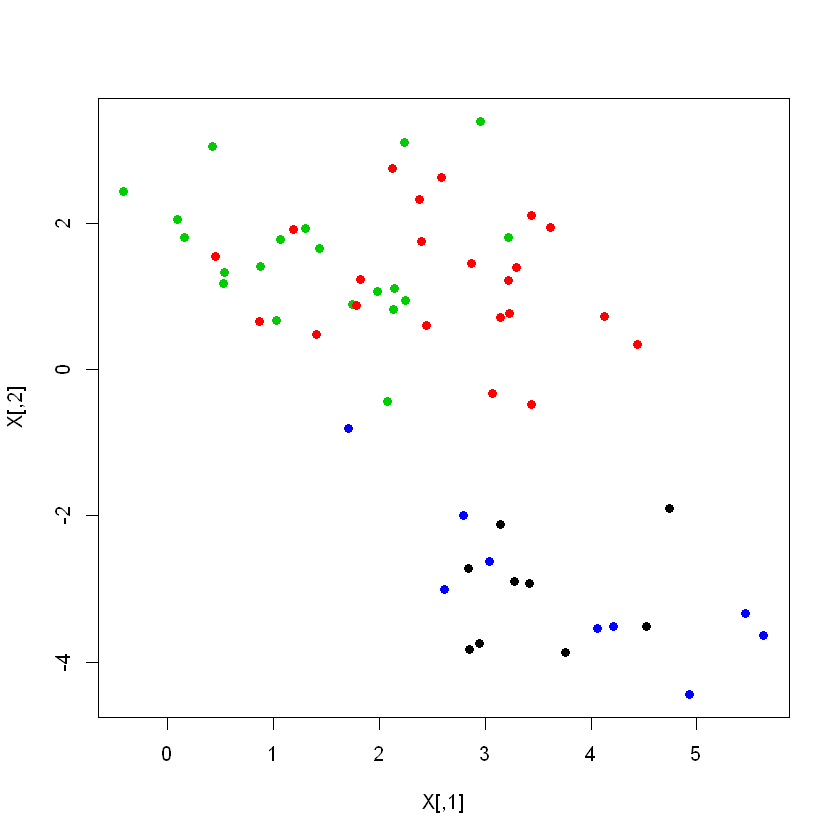

In [193]:
plot(X, col = cluster.color.3, pch = 19)

With K = 2, the green cluster from point a. is partition into two clusters (black and blue). The other cluster are the same as the original clusters.

**F.** Now perform K-means clustering with K = 3 on the first two
principal component score vectors, rather than on the raw data.
That is, perform K-means clustering on the 60 × 2 matrix of
which the first column is the first principal component score
vector, and the second column is the second principal component
score vector. Comment on the results.

In [201]:
PC <- pca.out$x[,1:2]

km.out.pca <- kmeans(PC,3, nstart = 15)
km.out.pca

K-means clustering with 3 clusters of sizes 20, 18, 22

Cluster means:
         PC1       PC2
1  10.727949 -7.322591
2   4.632999 10.848886
3 -13.543316 -2.219461

Clustering vector:
 [1] 3 3 1 2 3 3 3 1 2 1 2 1 2 1 1 2 3 3 1 3 2 1 2 1 1 3 2 3 2 1 3 1 3 2 2 1 1 1
[39] 3 2 1 2 1 1 2 2 3 2 3 3 3 3 2 3 3 2 3 1 3 1

Within cluster sum of squares by cluster:
[1] 36.09353 30.84479 31.23187
 (between_SS / total_SS =  99.0 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [202]:
cluster.color.4 <- km.out.pca$cluster
table(cluster.color.4,which)

               which
cluster.color.4  1  2  3
              1  0 20  0
              2  0  0 18
              3 22  0  0

Even though the k means was performed using much less data, it was capable of labelling correctly the clusters. This is because the first two principal components explain over 80% of the variability of the data.

**E.** Using the scale() function, perform K-means clustering with
K = 3 on the data after scaling each variable to have standard
deviation one. How do these results compare to those obtained
in (b)? Explain.

In [204]:
X.scaled <- scale(X)
km.out.scaled <- kmeans(X.scaled,3, nstart = 15)
cluster.color.scaled <- km.out.scaled$cluster
table(cluster.color.scaled,which)

                    which
cluster.color.scaled  1  2  3
                   1 22  0  0
                   2  0  0 18
                   3  0 20  0

The results are the same as in point B. The K-means method identified correctly the clusters. The variables were quite similar with each to begin with so scaling did not affect much. 